In [29]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform


In [15]:
u = mda.Universe("/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil/kalj_T0.6_n360_v300_1000000_1.lammpstrj", "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")


/ext3/miniconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


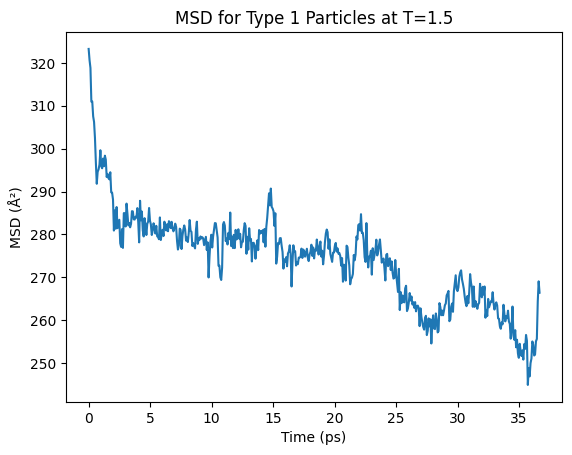

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def compute_MSD(universe, selection):
    """Compute MSD for a selection of atoms."""
    atoms = universe.select_atoms(selection)  # Select atoms by type
    n_frames = len(universe.trajectory)  # Number of frames in the trajectory
    msd = np.zeros(n_frames)  # Initialize array for MSD values
    
    # Loop through all frames in the trajectory
    for ts in universe.trajectory:
        # Calculate the displacement for each atom relative to the first frame
        displacements = atoms.positions - atoms.positions[0]
        
        # Calculate the mean squared displacement for the current frame
        msd[ts.frame] = np.mean(np.sum(displacements**2, axis=1))  # sum over dimensions, then average
    
    # Get the time corresponding to each frame in the trajectory
    times = [ts.time for ts in universe.trajectory]
    
    return times, msd

# Example: Compute MSD for type 1 particles (assuming "type 1" atoms are selected)
times, msd_A = compute_MSD(u, "type 1")

# Plot the MSD for Type 1 particles at T=1.5
plt.plot(times, msd_A)
plt.xlabel('Time (ps)')
plt.ylabel('MSD (Å²)')
plt.title('MSD for Type 1 Particles at T=1.5')
plt.show()


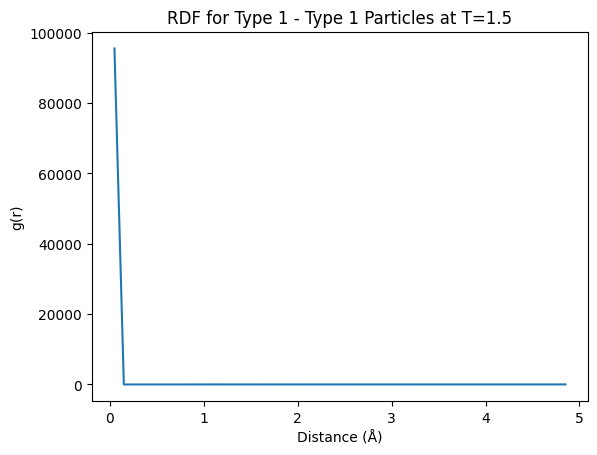

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist  # Use cdist for pairwise distances between two sets

def compute_RDF(universe, selection1, selection2, bin_size=0.1, max_distance=5.0):
    """Compute the RDF between two particle selections."""
    atoms1 = universe.select_atoms(selection1)
    atoms2 = universe.select_atoms(selection2)
    
    # Calculate pairwise distances between particles in atoms1 and atoms2
    distances = cdist(atoms1.positions, atoms2.positions)  # Use cdist instead of pdist
    
    # Flatten the distance matrix to 1D and filter distances <= max_distance
    distances = distances.flatten()
    distances = distances[distances <= max_distance]
    
    # Create a histogram of pairwise distances
    hist, bins = np.histogram(distances, bins=np.arange(0, max_distance, bin_size))
    
    # Normalize the histogram to get RDF
    density = len(atoms1) / (universe.dimensions[0] * universe.dimensions[1] * universe.dimensions[2])  # number density
    r = (bins[:-1] + bins[1:]) / 2  # bin centers
    rdf = hist / (4 * np.pi * r**2 * bin_size * density)  # Normalize by spherical shell volume
    
    return r, rdf

# Example: RDF between type 1 - type 1 particles
r_11, rdf_11 = compute_RDF(u, "type 1", "type 1")

# Plot the RDF for Type 1 - Type 1 particles at T=1.5
plt.plot(r_11, rdf_11)
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.title('RDF for Type 1 - Type 1 Particles at T=1.5')
plt.show()


Files for T=0.65 not found. Skipping this temperature.
Files for T=0.7 not found. Skipping this temperature.
Files for T=1.5 not found. Skipping this temperature.
Files for T=0.9 not found. Skipping this temperature.


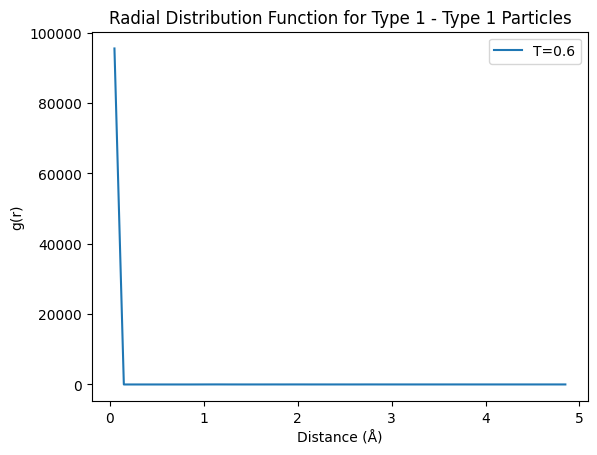

In [26]:
import MDAnalysis as mda
import matplotlib.pyplot as plt

# List of temperatures with available trajectory files
temperatures = [0.65, 0.6, 0.7, 1.5, 0.9]

# Corrected trajectory filenames based on available files
trajectory_files = {
    0.65: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd",
    0.6: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd",
    0.7: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd",
    1.5: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd",
    0.9: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd"
}

# Iterate over each temperature
for temp in temperatures:
    # Construct the topology filename dynamically
    topology_file = f"/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil/kalj_T{temp}_n360_v300_1000000_1.lammpstrj"
    
    # Check if the trajectory file exists for the given temperature
    if temp in trajectory_files:
        trajectory_file = trajectory_files[temp]
        
        try:
            # Load the topology and trajectory
            u = mda.Universe(topology_file, trajectory_file, topology_format="LAMMPSDUMP")
            
            # Compute RDF between type 1 - type 1 particles
            r_11, rdf_11 = compute_RDF(u, "type 1", "type 1")
            
            # Plot RDF for each temperature
            plt.plot(r_11, rdf_11, label=f'T={temp}')
        except FileNotFoundError:
            print(f"Files for T={temp} not found. Skipping this temperature.")
        except Exception as e:
            print(f"An error occurred for T={temp}: {e}")
    else:
        print(f"Trajectory file for T={temp} not found. Skipping this temperature.")

# Customize the plot
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for Type 1 - Type 1 Particles')
plt.legend()
plt.show()


In [36]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
from MDAnalysis.analysis import rdf, msd

# List of temperatures with corresponding trajectory files and topology files
temperatures = [0.65, 0.6, 0.7, 1.5, 0.9]
topology_files = {
    0.65: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil/kalj_T0.65_n360_v300_350000_1.lammpstrj",
    0.6: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil/kalj_T0.6_n360_v300_1000000_1.lammpstrj",
    0.7: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil/kalj_T0.7_n360_v300_180000_1.lammpstrj",
    1.5: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil/kalj_T1.5_n360_v300_10000_1.lammpstrj",
    0.9: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equil/kalj_T0.9_n360_v300_150000_1.lammpstrj"
}

trajectory_files = {
    0.65: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd",
    0.6: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd",
    0.7: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd",
    1.5: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd",
    0.9: "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd"
}

# Directory to save figures
figures_dir = "/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Figures"

# Function to compute RDF and plot
def compute_RDF(u, atom_selection_1, atom_selection_2, label):
    # Select atoms for both selections
    selection_1 = u.select_atoms(atom_selection_1)
    selection_2 = u.select_atoms(atom_selection_2)
    
    # Create RDF object
    rdf_analysis = rdf.InterRDF(selection_1, selection_2, range=(0.0, 10.0), bins=200)
    rdf_analysis.run()
    
    # Plot RDF
    plt.plot(rdf_analysis.bins, rdf_analysis.rdf, label=label)
    plt.xlabel('Distance (Å)')
    plt.ylabel('g(r)')
    plt.title(f'Radial Distribution Function {atom_selection_1}-{atom_selection_2}')
    plt.legend()

# Function to compute MSD and plot
def compute_MSD(u, atom_selection, label):
    # Select atoms for MSD
    atoms = u.select_atoms(atom_selection)
    
    # Compute MSD using the correct MSD class
    msd_analysis = msd.MSD(atoms)  # Use MSD directly here
    msd_analysis.run()

    # Plot MSD
    plt.plot(msd_analysis.times, msd_analysis.results.timeseries, label=label)
    plt.xlabel('Time (ps)')
    plt.ylabel('MSD (Å²)')
    plt.title(f'Mean Squared Displacement (MSD) of {atom_selection} Particles')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()

# Initialize figure for RDF plots
plt.figure(figsize=(12, 8))

# Compute RDFs for different temperature conditions
for temp in temperatures:
    # Load the trajectory and topology
    u = mda.Universe(topology_files[temp], trajectory_files[temp], topology_format="LAMMPSDUMP")
    
    # Compute RDF for type 1 - type 1, type 2 - type 2, type 1 - type 2
    compute_RDF(u, "type 1", "type 1", f'T={temp} type 1 - type 1')
    compute_RDF(u, "type 2", "type 2", f'T={temp} type 2 - type 2')
    compute_RDF(u, "type 1", "type 2", f'T={temp} type 1 - type 2')

# Save RDF plot
plt.tight_layout()
plt.savefig(f"/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/rdf_all_temperatures.png")
plt.close()

# Initialize figure for MSD plots
plt.figure(figsize=(12, 8))

# Compute MSD for type 1 particles at each temperature
for temp in temperatures:
    # Load the trajectory and topology
    u = mda.Universe(topology_files[temp], trajectory_files[temp], topology_format="LAMMPSDUMP")
    
    # Compute MSD for type 1 particles
    compute_MSD(u, "type 1", f'T={temp} MSD')

# Save MSD plot
plt.tight_layout()
plt.savefig(f"/home/ap8064/comp-lab-class/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/msd_all_temperatures.png")
plt.close()

# Find time when MSD = 1 for each temperature
times_msd_1 = []
for temp in temperatures:
    # Load the trajectory and topology
    u = mda.Universe(topology_files[temp], trajectory_files[temp], topology_format="LAMMPSDUMP")
    
    # Compute MSD for type 1 particles
    msd_analysis = msd.MSD(u.select_atoms("type 1"))  # Use MSD directly here
    msd_analysis.run()
    
    # Find the time when MSD = 1 (diffusion time)
    time_msd_1 = msd_analysis.results.timeseries[np.where(msd_analysis.results.timeseries >= 1)[0][0]]
    times_msd_1.append(time_msd_1)

# Convert temperatures to 1/T
inv_temperatures = 1 / np.array(temperatures)

# Plot time vs 1/T
plt.figure(figsize=(12, 8))
plt.plot(inv_temperatures, times_msd_1, marker='o')
plt.xlabel('1/T (1/K)')
plt.ylabel('Time when MSD = 1 (ps)')
plt.title('Time when MSD = 1 vs 1/T')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig(f"{figures_dir}/msd_1_vs_1T.png")
plt.close()


AttributeError: module 'MDAnalysis.analysis.msd' has no attribute 'MSD'

<Figure size 1200x800 with 0 Axes>